# How to install Bokeh, pandas and jupyter notebook.

# Anaconda:

# https://www.continuum.io/downloads


# All Jupyter notebook, ipython, Pandas and bokeh packages can be downloaded from the Anaconda continuum.

# Once you have installed conda, you can type follwoing command from your terminal: 

# `conda install bokeh` 



# Bokeh has a good domumentation:  

# http://bokeh.pydata.org/en/0.11.1/docs/user_guide.html

In [13]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns



%matplotlib inline

#  Bokeh has three different output destinations: html file, notebook and server.

In [14]:
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

#  The simplest example of plotting

In [15]:
from bokeh.plotting import figure, output_file, show

# prepare some data
x = [1, 2, 3, 4, 5]
y = [6, 7, 2, 4, 5]


# create a new plot with a title and axis labels
p = figure(title="simple line example", x_axis_label='x label', y_axis_label='y label')

# add a line renderer with legend and line thickness
p.line(x, y, legend="line", line_width=2)

# show the results
show(p)

In [16]:
from bokeh.plotting import figure, output_file, show

# prepare some data
x = [1, 2, 3, 4, 5]
y = [6, 7, 2, 4, 5]


# create a new plot with a title and axis labels
p = figure(title="simple example", x_axis_label='x label', y_axis_label='y label')

# add a line renderer with legend and line thickness
p.line(x, y, legend="line", line_width=2)

p.circle(x,y, radius = 0.11)

# show the results
show(p)

# Hover tool example

In [5]:
from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.models import HoverTool


source = ColumnDataSource(
        data=dict(
            x=[1, 2, 3, 4, 5],
            y=[2, 5, 8, 2, 7],
            desc=['A', 'b', 'C', 'd', 'E'],
        )
    )

hover = HoverTool(
        tooltips=[
            ("index", "$index"),
            ("(x,y)", "($x, $y)"),
            ("desc", "@desc"),
        ]
    )

p = figure(plot_width=400, plot_height=400, tools=[hover],
           title="Mouse over the dots")

p.circle('x', 'y', size=20, source=source)

show(p)

# Adjusting bokeh tools

In [6]:
from bokeh.plotting import figure, show, output_file
import numpy as np

N = 4000
x = np.random.random(size=N) * 100
y = np.random.random(size=N) * 100
radii = np.random.random(size=N) * 1.5
colors = [
    "#%02x%02x%02x" % (int(r), int(g), 150) for r, g in zip(50+2*x, 30+2*y)
]

TOOLS="resize,crosshair,pan,wheel_zoom,box_zoom,undo,redo,reset,tap,previewsave,box_select,poly_select,lasso_select"

p = figure(tools=TOOLS)

p.scatter(x, y, radius=radii,
          fill_color=colors, fill_alpha=0.6,
          line_color=None)


show(p)

#  Exporting to Bokech from Matplotlib

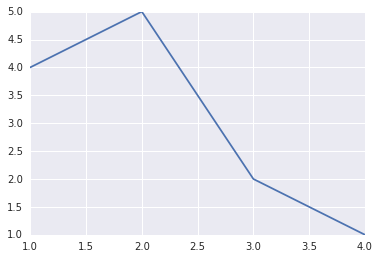

In [17]:
x = [1,2,3,4]
y = [4,5,2,1]
plt.plot(x,y)

In [18]:
from bokeh import mpl


x = [1,2,3,4]
y = [4,5,2,1]
plt.plot(x,y)

show(mpl.to_bokeh())

# Widget

In [7]:
from bokeh.models.widgets import Slider
from bokeh.io import output_file, show, vform, output_notebook


slider = Slider(start=0, end=10, value=1, step=.023, title="Stuff")

show(vform(slider))



# However, to make your graph manupulatable, you need add custom javascript or output to the Bokeh server.

# This is an example form the Bokeh web site, which does not need the Bokeh server.  However, you need to add custom Javascript to make it interactive.  

In [8]:
from bokeh.io import vform
from bokeh.models import CustomJS, ColumnDataSource, Slider
from bokeh.plotting import Figure, output_file, show


x = [x*0.005 for x in range(0, 200)]
y = x

source = ColumnDataSource(data=dict(x=x, y=y))

plot = Figure(plot_width=400, plot_height=400)
plot.line('x', 'y', source=source, line_width=3, line_alpha=0.6)

callback = CustomJS(args=dict(source=source), code="""
        var data = source.get('data');
        var f = cb_obj.get('value')
        x = data['x']
        y = data['y']
        for (i = 0; i < x.length; i++) {
            y[i] = Math.pow(x[i], f)
        }
        source.trigger('change');
    """)

slider = Slider(start=0.1, end=4, value=1, step=.1, title="power", callback=callback)

layout = vform(slider, plot)

show(layout)

#  On your terminal, you must start local Bochke server to run the cell below.

# To initiate the sever, type following command:

# `bokeh serve`

In [11]:
''' 
on your terminal type 'bokeh serve' before you run this cell. 
'''
import numpy as np

from bokeh.plotting import Figure
from bokeh.models import ColumnDataSource, HBox, VBoxForm
from bokeh.models.widgets import Slider, TextInput
from bokeh.io import curdoc
from bokeh.plotting import figure, show, output_server


from bokeh.client import push_session
from bokeh.driving import cosine
from bokeh.plotting import figure, curdoc



# Set up data
N = 200
x = np.linspace(0, 4*np.pi, N)
y = np.sin(x)
source = ColumnDataSource(data=dict(x=x, y=y))


# Set up plot
plot = Figure(plot_height=400, plot_width=400, title="my sine wave",
              tools="crosshair,pan,reset,resize,save,wheel_zoom",
              x_range=[0, 4*np.pi], y_range=[-2.5, 2.5])

plot.line('x', 'y', source=source, line_width=3, line_alpha=0.6)


# Set up widgets
text = TextInput(title="title", value='my sine wave')
offset = Slider(title="offset", value=0.0, start=-5.0, end=5.0, step=0.1)
amplitude = Slider(title="amplitude", value=1.0, start=-5.0, end=5.0)
phase = Slider(title="phase", value=0.0, start=0.0, end=2*np.pi)
freq = Slider(title="frequency", value=1.0, start=0.1, end=5.1)


# Set up callbacks
def update_title(attrname, old, new):
    plot.title = text.value

text.on_change('value', update_title)

def update_data(attrname, old, new):

    # Get the current slider values
    a = amplitude.value
    b = offset.value
    w = phase.value
    k = freq.value

    # Generate the new curve
    x = np.linspace(0, 4*np.pi, N)
    y = a*np.sin(k*x + w) + b

    source.data = dict(x=x, y=y)

for w in [offset, amplitude, phase, freq]:
    w.on_change('value', update_data)


# Set up layouts and add to document
inputs = VBoxForm(children=[text, offset, amplitude, phase, freq])

curdoc().add_root(HBox(children=[inputs, plot], width=800))


#output_server()

session = push_session(curdoc())
session.show() # open the document in a browser
session.loop_until_closed() # run forever




In [ ]:


from bokeh.client import push_session
from bokeh.driving import cosine
from bokeh.plotting import figure, curdoc


import numpy as np

from bokeh.models import Button
from bokeh.palettes import RdYlBu3
from bokeh.plotting import figure, curdoc, vplot

# create a plot and style its properties
p = figure(x_range=(0, 100), y_range=(0, 100), toolbar_location=None)
p.border_fill_color = 'black'
p.background_fill_color = 'black'
p.outline_line_color = None
p.grid.grid_line_color = None

# add a text renderer to out plot (no data yet)
r = p.text(x=[], y=[], text=[], text_color=[], text_font_size="20pt",
           text_baseline="middle", text_align="center")

i = 0

ds = r.data_source

# create a callback that will add a number in a random location
def callback():
    global i
    ds.data['x'].append(np.random.random()*70 + 15)
    ds.data['y'].append(np.random.random()*70 + 15)
    ds.data['text_color'].append(RdYlBu3[i%3])
    ds.data['text'].append(str(i))
    ds.trigger('data', ds.data, ds.data)
    i = i + 1

# add a button widget and configure with the call back
button = Button(label="Press Me")
button.on_click(callback)

# put the button and plot in a layout and add to the document
curdoc().add_root(vplot(button, p))


session = push_session(curdoc())
session.show() # open the document in a browser
session.loop_until_closed() # run forever



#  Real life example

# Mapping walking time to RTA bus stops

In [19]:
df = pd.read_csv('Address_151k.csv')

In [20]:
df.head()

addr_lat  addr_lon  walking_time
0    41.214   -81.855        1853.0
1    41.214   -81.854        1923.0
2    41.214   -81.853        1972.0
3    41.214   -81.852        2016.0
4    41.214   -81.851        2045.0

(41.2, 41.7)

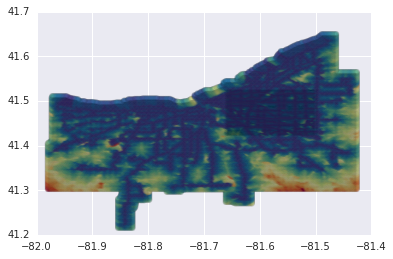

In [22]:
plt.scatter(df.addr_lon, df.addr_lat, c= (8000-df.walking_time), alpha = 0.1,cmap="Spectral")
plt.xlim(-82,-81.4)
plt.ylim(41.2,41.7)

In [23]:
def convert_to_rgb(val, minval= 0, maxval = 7519, colors = [(0, 0, 255), (0, 255, 0), (255, 0, 0)]):
    max_index = len(colors)-1
    v = float(val-minval) / float(maxval-minval) * max_index
    i1, i2 = int(v), min(int(v)+1, max_index)
    (r1, g1, b1), (r2, g2, b2) = colors[i1], colors[i2]
    f = v - i1
    return "#%02x%02x%02x" % (int(r1 + f*(r2-r1)), int(g1 + f*(g2-g1)), int(b1 + f*(b2-b1)))


In [24]:
df['walking_color'] = df['walking_time'].apply(convert_to_rgb)

In [25]:
df.head()

addr_lat  addr_lon  walking_time walking_color
0    41.214   -81.855        1853.0       #007d81
1    41.214   -81.854        1923.0       #00827c
2    41.214   -81.853        1972.0       #008579
3    41.214   -81.852        2016.0       #008876
4    41.214   -81.851        2045.0       #008a74

In [26]:
df['time']= df.walking_time/60

In [27]:
df['time'] = df['time'].astype(int)

In [28]:
df.head()

addr_lat  addr_lon  walking_time walking_color  time
0    41.214   -81.855        1853.0       #007d81    30
1    41.214   -81.854        1923.0       #00827c    32
2    41.214   -81.853        1972.0       #008579    32
3    41.214   -81.852        2016.0       #008876    33
4    41.214   -81.851        2045.0       #008a74    34

In [29]:
df.dtypes

addr_lat         float64
addr_lon         float64
walking_time     float64
walking_color     object
time               int64
dtype: object

In [30]:
from bokeh.models import WheelZoomTool, PanTool, HoverTool, BoxSelectTool, ColumnDataSource
from bokeh.plotting import figure, show, output_file

    

#TOOLS="hover, pan,"


source = ColumnDataSource(data=df)
      

hover = HoverTool(
        tooltips=[
            
            ('GPS','(@addr_lon, @addr_lat)'),
            ("walking_time","@time"),
           
        ]
    )




fig = figure(tools=[WheelZoomTool(),BoxSelectTool(),PanTool(), hover])

fig.circle('addr_lon','addr_lat', color = 'walking_color' ,alpha=0.4, radius = 0.0008,
            source = source)



show(fig)  # open a browser